<a href="https://colab.research.google.com/github/prathamlineswala201103-star/Advanced-Linear-Regression-Model/blob/main/Advanced_Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows:
    petal_length
0           1.4
1           1.4
2           1.3
3           1.5
4           1.4
Missing values:
 petal_length    0
dtype: int64
Summary Statistics:
        petal_length
count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000


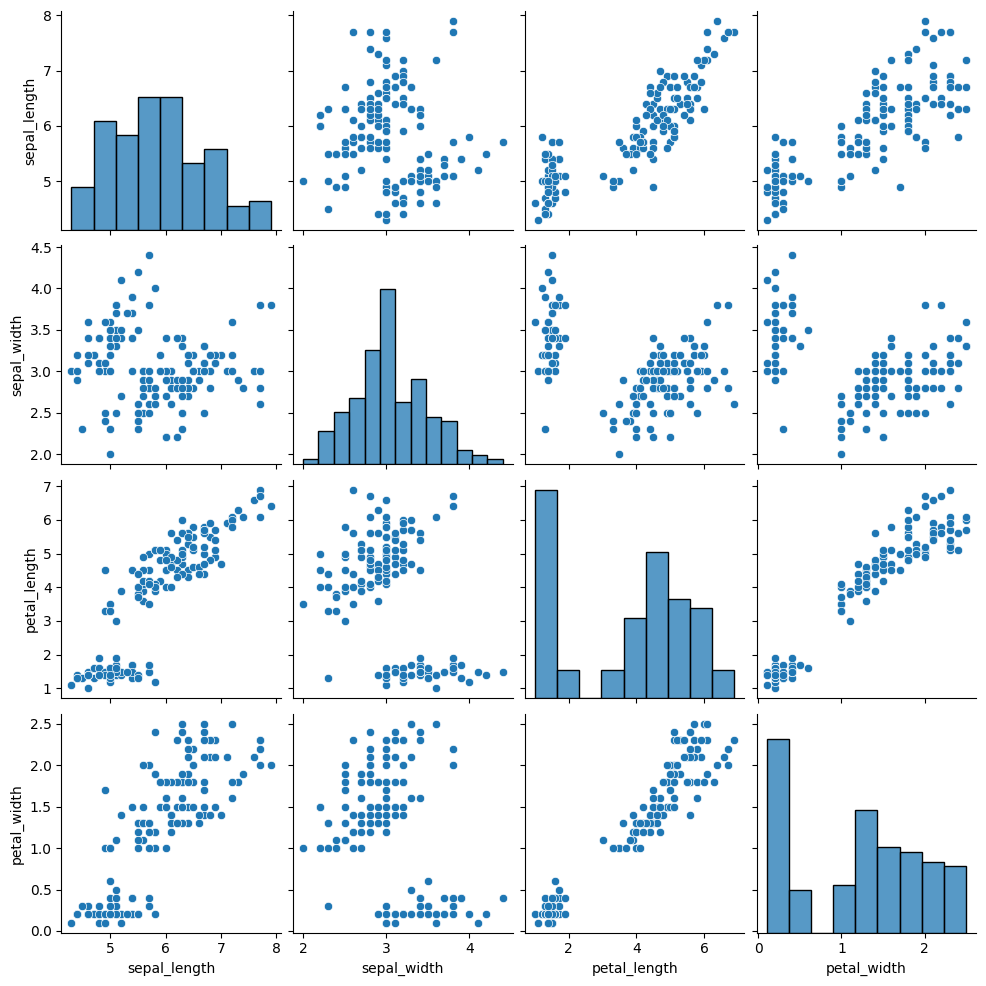

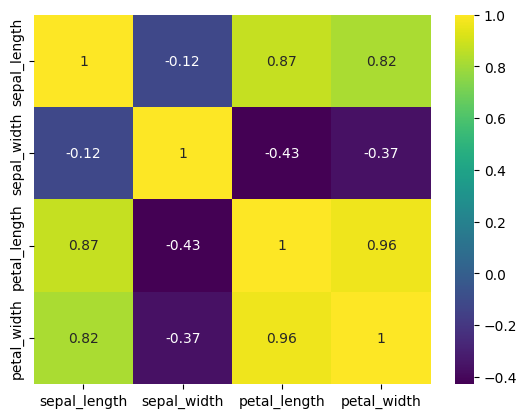

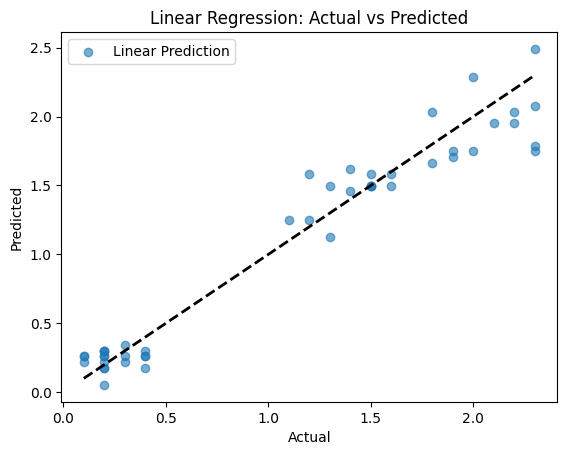

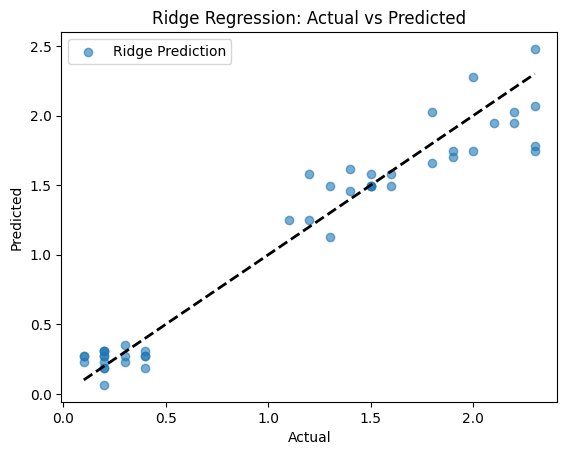

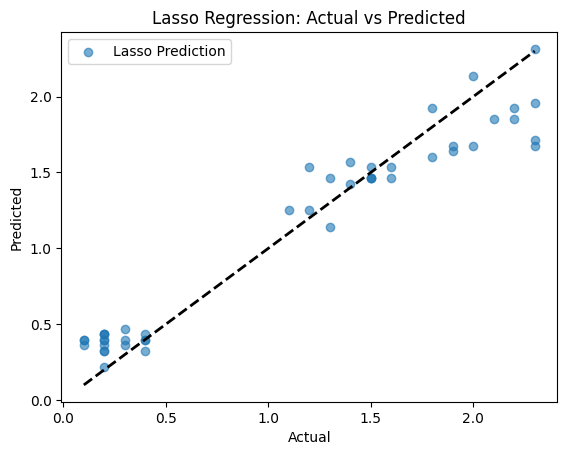

Model Performance Comparison:
Linear: {'RMSE': np.float64(0.18784422728496195), 'MAE': 0.14595580519004586, 'R2': 0.9445739521923764}
Ridge: {'RMSE': np.float64(0.18845913871980646), 'MAE': 0.1465924405508865, 'R2': 0.9442104819353705}
Lasso: {'RMSE': np.float64(0.22342477931768367), 'MAE': 0.17623390510497886, 'R2': 0.9215882979407986}
Polynomial RMSE: 0.18767815840602636


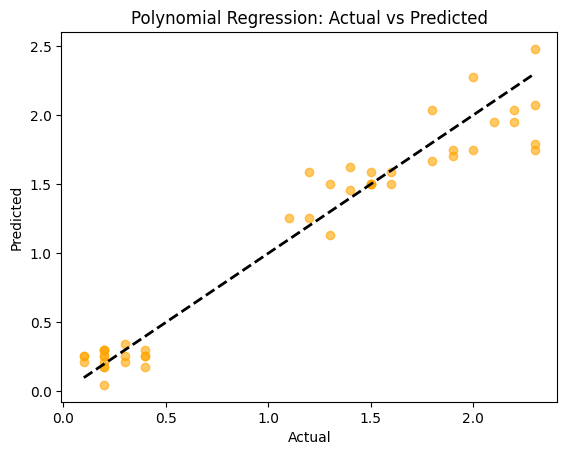

Average 5-Fold CV RMSE: 0.19519549538248043


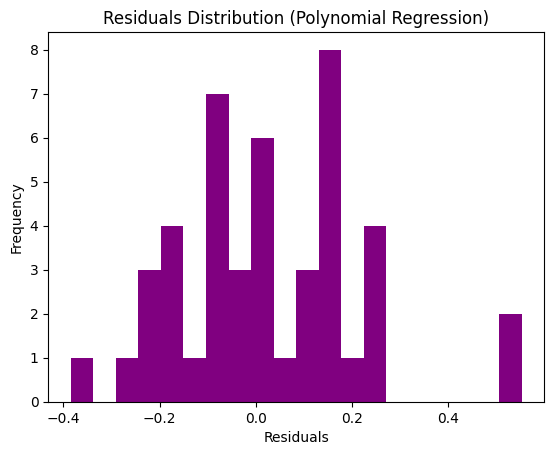

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- LOAD DATA ---
# Replace with your actual data loading step
# Example: df = pd.read_csv('your_data.csv')
iris = sns.load_dataset('iris')
X = iris[['petal_length']]
y = iris['petal_width']

# --- DATA EXPLORATION ---
print("First 5 rows:\n", X.head())
print("Missing values:\n", X.isnull().sum())
print("Summary Statistics:\n", X.describe())
sns.pairplot(iris)
plt.show()
sns.heatmap(iris.select_dtypes(include=[np.number]).corr(), annot=True, cmap='viridis')
plt.show()

# --- DATA SPLITTING ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- STANDARDIZATION ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- REGRESSION MODELS ---
models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1)
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }
    plt.scatter(y_test, y_pred, label=f'{name} Prediction', alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.title(f"{name} Regression: Actual vs Predicted")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.legend()
    plt.show()

print("Model Performance Comparison:")
for name, metrics in results.items():
    print(f"{name}: {metrics}")

# --- POLYNOMIAL REGRESSION (DEGREE 2) ---
poly_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('reg', LinearRegression())
])
poly_pipeline.fit(X_train, y_train)
y_poly_pred = poly_pipeline.predict(X_test)

print("Polynomial RMSE:", np.sqrt(mean_squared_error(y_test, y_poly_pred)))

plt.scatter(y_test, y_poly_pred, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Polynomial Regression: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# --- CROSS VALIDATION ---
cv_score = cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_root_mean_squared_error')
print("Average 5-Fold CV RMSE:", -cv_score.mean())

# --- RESIDUAL ANALYSIS ---
residuals = y_test - y_poly_pred
plt.hist(residuals, bins=20, color='purple')
plt.title("Residuals Distribution (Polynomial Regression)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()